### Data Mining Project
### Customer Segmentation

#### Group 18


By- 

Sharayu Thosar

Yishtavi Gedipudi


In [182]:
#Importing required Libraries
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time
import plotly.graph_objects as go

In [183]:

#Reading the data
df = pd.read_csv("marketing_campaign.csv", header=1).reset_index(drop=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [184]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Cleaning

### Changing the datatype

In [185]:
#Converting to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

<ipython-input-185-eaba0a76aec8>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



### Generating  columns
1. Age of customer from date of birth
2. Years of enrollment from date of enrollment

In [186]:
#Calculating the age of customer (relative to 2023)
df['Age'] = 2023-df['Year_Birth']

In [187]:
#Calculating the years of enrollment relative to 2023 for customer from the date of enrollment
df['enrollment_years'] = 2023 - df['Dt_Customer'].dt.strftime('%Y').astype(int)

### Handling Missing Values

In [188]:
# Check for missing data
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
enrollment_years        0
dtype: int64


### Income has 24 missing values. However, to replace these missing values, we should if there are any outliers in the income data. 

As we can see from the graph, there are a few outliers in the income column


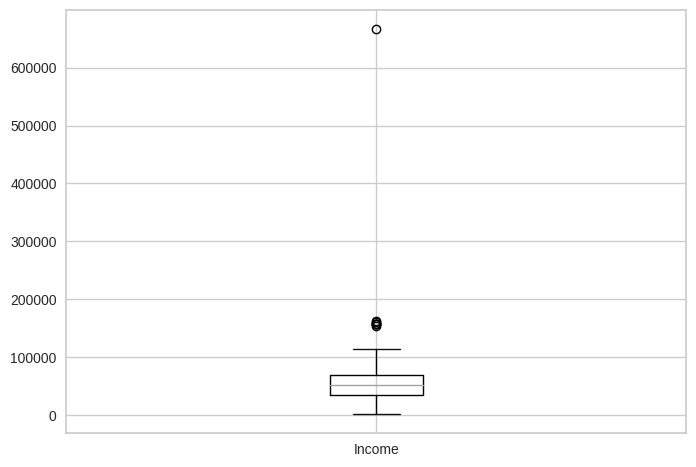

In [189]:
#Boxplot for Income variable
df.boxplot(column=['Income'])
print("As we can see from the graph, there are a few outliers in the income column")

In [190]:
# Removing the outliers in the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [191]:
# Now substituting the missing values in income column with the mean

#Calculating mean of income 
mean_income = df['Income'].mean()

#Replacing null values with mean
df['Income'].fillna(value=mean_income, inplace=True)

<ipython-input-191-842498aa15aa>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [192]:
print(df.isnull().sum())
print("No Missing values in the data")

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
enrollment_years       0
dtype: int64
No Missing values in the data


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2232 non-null   int64         
 1   Year_Birth           2232 non-null   int64         
 2   Education            2232 non-null   object        
 3   Marital_Status       2232 non-null   object        
 4   Income               2232 non-null   float64       
 5   Kidhome              2232 non-null   int64         
 6   Teenhome             2232 non-null   int64         
 7   Dt_Customer          2232 non-null   datetime64[ns]
 8   Recency              2232 non-null   int64         
 9   MntWines             2232 non-null   int64         
 10  MntFruits            2232 non-null   int64         
 11  MntMeatProducts      2232 non-null   int64         
 12  MntFishProducts      2232 non-null   int64         
 13  MntSweetProducts     2232 non-nul

### Analysing Numerical Variables

### Checking for outliers in the numerical features
1. Income - It had a few outliers that are removed and missing values are replaced by mean
2. Age - We can see that in the age column, there are a few people with age greater than 120, while most lie between 20-80 years of age. 

<Axes: >

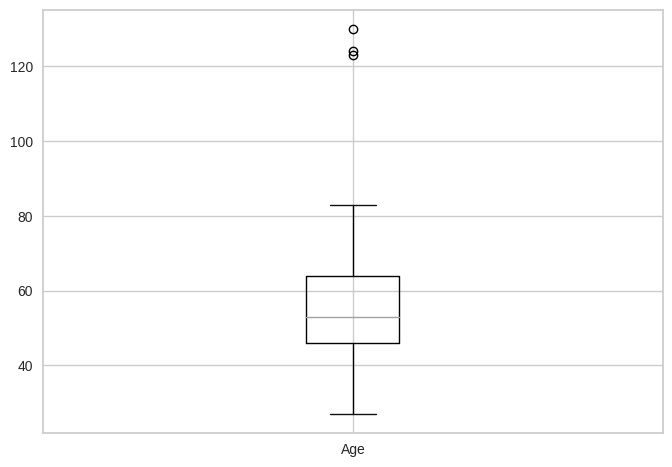

In [194]:
df.boxplot(column= ['Age'])

### The outliers in the age column with age greater than 100, are mostly dead and won't contribute well to our analysis, as they no longer can be called as customers. Therefore, removing these age outliers

In [195]:
#Removing age outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

### Analysing the Categorical Variables
1. Education
2. Marital Status

#### The aim of analysing categorical variables is to remove the unneccessary categories by combining or dropping. This will ensure aid in reduce dimensions when we create dummy variables. 

In [196]:
#Counting categories in Education
print(df['Education'].value_counts())
print("Education categories look decent as all have significant data and there is no scope of further categorization")

Graduation    1124
PhD            481
Master         369
2n Cycle       201
Basic           54
Name: Education, dtype: int64
Education categories look decent as all have significant data and there is no scope of further categorization


In [197]:
#Counting categories in Marital Status
df['Marital_Status'].value_counts()

Married     861
Together    575
Single      479
Divorced    230
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

#### Here, we can see some irrelavant categories named Alone, Absurd and YOLO that don't exactly relate to the marital status. 

#### For the  Alone category, we can combine it with Single category, as it means the same. 

In [198]:
#Replacing Alone with Single Category
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single'})

### For 'YOLO' and 'Absurd', we need to investigate further by seeing the records. We can analyse it by assesing the other corresponding information

In [199]:
#Displaying record with YOLO
df[df['Marital_Status']=='YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,enrollment_years
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,0,0,0,0,0,3,11,0,50,11
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,0,0,0,0,0,3,11,1,50,11


For 'YOLO', we can observe that all the information in columns is the same except for the ID and response (once 0 and then 1). So, we can assume this as an unrequired entry and delete the records. 

In [200]:
#Dropping the rows with 'YOLO' as Marital Status
index_yolo = df[df['Marital_Status']=='YOLO'].index
df.drop(index_yolo , inplace=True)
df.reset_index(drop=True)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,enrollment_years
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,66,11
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,69,9
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,58,10
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,39,9
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,42,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,56,10
2223,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,1,0,0,3,11,0,77,9
2224,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,42,9
2225,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,67,9


In [201]:
#Dsiplaying records with Absurd
df[df['Marital_Status']=='Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,enrollment_years
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,0,1,1,0,0,3,11,1,30,11
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-10-01,48,240,...,0,0,0,0,0,3,11,0,66,9


For marital status 'Absurd', we can identify that they are two different people. Here, we can just eliminate the 'Absurd' category by combining it with the mode of Marital Status. 
As Married is the mode of category. We can substitute 'Absurd' to 'Married'

In [202]:
#Replacing Absurd with Married
df['Marital_Status'] = df['Marital_Status'].replace({'Absurd': 'Married'})

In [203]:
#Categories in Marital Status
df['Marital_Status'].value_counts()

Married     863
Together    575
Single      482
Divorced    230
Widow        77
Name: Marital_Status, dtype: int64

## Dimension Reduction

1. Age and Year_Birth convey the same information. Therefore, we can drop Year_Birth
2. We derived number of enrollment years, so Dt_Customer can be dropped
3. ID as a feature does not contribute to clustering the customer, therefore we can drop ID Column
4. Z_CostContact has a constant value of 3, and will not contribute in clustering customers, therefore can be removed
5. Z_Revenue also has constant value of 11 and can be dropped. 

In [204]:
#Dropping the above mentioned columns to reduce the dimension of the data and conserving only important information
df.drop(columns=['Year_Birth', 'Dt_Customer', 'ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

In [205]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,enrollment_years
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,66,11
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,69,9
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,58,10
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,39,9
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,42,9


### Looking for Duplicate data


In [206]:
#Calculating Correlation Matrix
df_corr = df.corr()

<ipython-input-206-3b1ee15e8deb>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

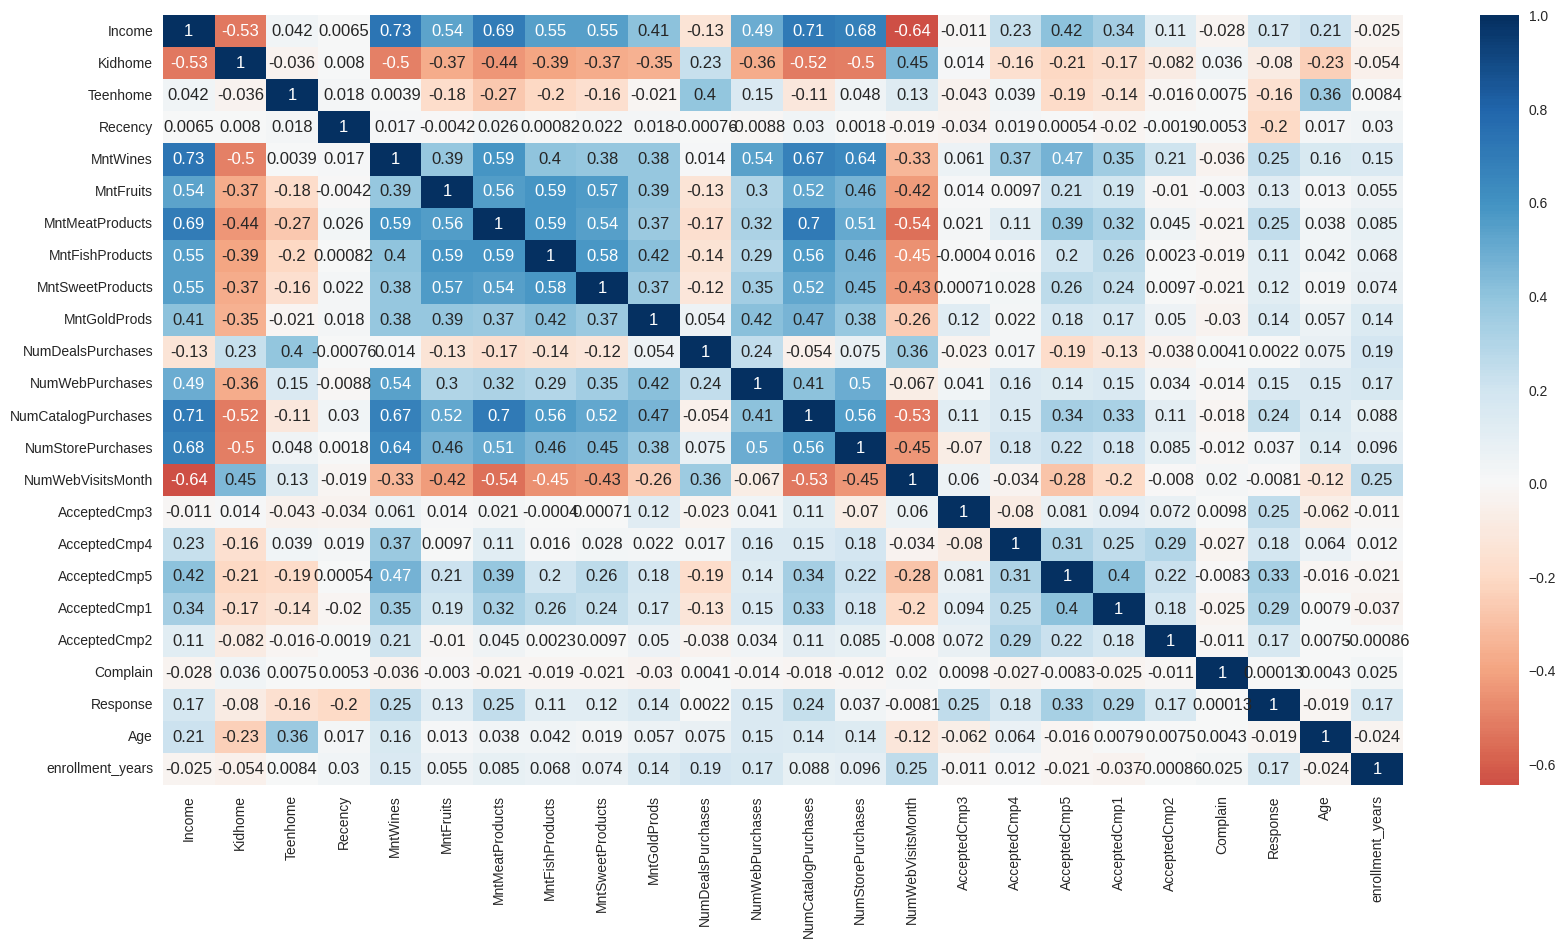

In [207]:
#Plotting heatmap
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df_corr, ax=ax, annot=True, center=0, cmap='RdBu')

###Adding certain columns for further analysis

Classifying education into Higher, Basic or Low level of education.

In [208]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 'High'
    elif education == 'Basic':
        return 'Medium'
    else:
        return 'Low'

df['Education_Level'] = df['Education'].map(education_level)

Using Marital _Status to determine the Living status(Alone, Not Alone) of customers.

In [209]:
def living_status(marital_status):
    if marital_status in ['Alone', 'Married']:
        return 'Alone'
    else:
        return 'Not Alone'

# Creating a new column 'Living_Status'
df['Living_Status'] = df['Marital_Status'].map(living_status)
#df.head()

*Analysing* total number of campaigns accepted

In [210]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Total_Campaigns_Accepted'] = df[campaign_cols].sum(axis=1)
#df.head()

Calculating average spend per purchase

In [211]:
amount_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
amount_sum = df[amount_cols].sum(axis=1)

df['Average_Spend'] = amount_sum / df['NumDealsPurchases']

Calculating total spent

In [212]:
amt_sum = df[amount_cols].sum(axis=1)
df['Spent'] = amt_sum

Checking for parent status

In [213]:
df['Parent_Status'] = df[['Kidhome', 'Teenhome']].apply(lambda x: 1 if x.sum() > 0 else 0, axis=1)

Calculating total spending in the last 2 years

In [214]:
df['total_spending(2yrs)'] = df.loc[:, 'MntWines':'MntGoldProds'].sum(axis=1)

Calculating average monthly visits to the company's website,

In [215]:
df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12

Calculating ratio of online purchases to total purchases

In [216]:
df['online_purchase_ratio'] = df['NumWebPurchases'] / df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,enrollment_years,Education_Level,Living_Status,Total_Campaigns_Accepted,Average_Spend,Spent,Parent_Status,total_spending(2yrs),avg_web_visits,online_purchase_ratio
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,11,High,Not Alone,0,539.0,1617,0,1617,0.583333,0.363636
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,9,High,Not Alone,0,13.5,27,1,27,0.416667,0.250000
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,High,Not Alone,0,776.0,776,0,776,0.333333,0.400000
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,9,High,Not Alone,0,26.5,53,1,53,0.500000,0.333333
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,9,High,Alone,0,84.4,422,1,422,0.416667,0.357143


##VISUALIZATIONS

In [217]:
import plotly.graph_objects as go
import pandas as pd

# define the age groups
age_groups = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']

# classify the ages and create a pandas DataFrame
df_age = pd.DataFrame()
df_age['age'] = df['Age']
df_age['age_group'] = pd.cut(df_age['age'], [21, 30, 40, 50, 60, 70, 80, 120], labels=age_groups)

# count the occurrences of each age group
counts = df_age['age_group'].value_counts()

# create a bar plot using Plotly
fig = go.Figure(go.Bar(x=counts.index, y=counts.values, marker_color='indianred'))
fig.update_layout(title='Distribution of Customer\'s Age', xaxis_title='Age Group', yaxis_title='Count')
fig.show()

Distribution of Marital Status

In [218]:
import plotly.graph_objs as go

# Counting the number of occurrences for each marital status
marital_counts = df['Marital_Status'].value_counts()

colors = ["#800000", "#FF7F50", "#FFCC33", "#800080", "#542788", "#2d004b"]
fig = go.Figure(data=[go.Pie(labels=marital_counts.index, values=marital_counts.values, marker=dict(colors=colors))])
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)', 
    font_family="Georgia", 
    font_size=12, 
    title='Marital Status Distribution'
)


fig.show()

This plot displays the distribution of customers based on their marital status, which can provide insights into the diversity of family structures represented in the dataset. By visualizing the number of customers in each marital status category, we can gain a better understanding of the different types of households that are present in the data. This information could be helpful for businesses and organizations that are looking to tailor their products or services to different family structures, or for researchers who are interested in studying the social and demographic characteristics of the population.


###Distribution of Education Level

In [219]:
# Calculating education level counts
edu_counts = df['Education_Level'].value_counts()

colors = ["#800000", "#FF7F50", "#FFCC33", "#800080", "#542788", "#2d004b"]

# Creating horizontal bar chart 
fig = px.bar(x=edu_counts.values, y=edu_counts.index, orientation='h', title='Education Level Distribution', color=edu_counts.index, color_discrete_sequence=colors)
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)', 
    font_family="Arial", 
    font_size=12, 
    xaxis_title='Number of Customers',
    yaxis_title='Education Level'
)

fig.show()

This plot displays the distribution of customers based on their education level, which provides insights into the level of education of the customers in the dataset. By visualizing the number of customers in each education level category, we can gain a better understanding of the educational diversity of the population. This information is useful in understanding the potential income levels of the customers, as there is often a correlation between education level and income. This plot could be beneficial for businesses and organizations that are looking to tailor their products or services to customers with different educational backgrounds, or for researchers who are interested in studying the relationship between education and income.

###Average Spend by Marital Status

In [220]:
# Creating box plot of average spend by marital status
colors = ["#800000", "#FF7F50", "#FFCC33", "#800080", "#542788", "#2d004b"]
fig = px.box(df, x='Marital_Status', y='Average_Spend', title='Distribution of Average Spending by Marital Status', color= 'Marital_Status', color_discrete_sequence=colors)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)', 
    font_family="Arial", 
    font_size=12, 
    xaxis_title='Marital Status',
    yaxis_title='Average Spend'
)

fig.show()

Spending Distribution by Marital Status, Education Level,Parent_Status

In [221]:
import plotly.subplots as sp
import plotly.graph_objs as go

# Create subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('Marital Status', 'Education Level', 'Is Parent'))

# Add histograms to subplots
fig.add_trace(go.Histogram(x=df[df['Marital_Status']=='Single']['total_spending(2yrs)'], nbinsx=50, name='Single'), row=1, col=1)
fig.add_trace(go.Histogram(x=df[df['Marital_Status']=='Married']['total_spending(2yrs)'], nbinsx=50, name='Married'), row=1, col=1)
fig.add_trace(go.Histogram(x=df[df['Marital_Status']=='Divorced']['total_spending(2yrs)'], nbinsx=50, name='Divorced'), row=1, col=1)

fig.add_trace(go.Histogram(x=df[df['Education_Level']=='High']['total_spending(2yrs)'], nbinsx=50, name='Graduate'), row=1, col=2)
fig.add_trace(go.Histogram(x=df[df['Education_Level']=='Medium']['total_spending(2yrs)'], nbinsx=50, name='Post-Graduate'), row=1, col=2)
fig.add_trace(go.Histogram(x=df[df['Education_Level']=='Low']['total_spending(2yrs)'], nbinsx=50, name='High School'), row=1, col=2)

fig.add_trace(go.Histogram(x=df[df['Parent_Status']==True]['total_spending(2yrs)'], nbinsx=50, name='Parent'), row=1, col=3)
fig.add_trace(go.Histogram(x=df[df['Parent_Status']==False]['total_spending(2yrs)'], nbinsx=50, name='Not Parent'), row=1, col=3)

# Update layout
fig.update_layout(
    title='Spending Distribution by Demographic Factors',
    xaxis=dict(title='Total Spending'),
    yaxis=dict(title='Count'),
    showlegend=True
)

# Show figure
fig.show()


Relation between "Income", "NumWebPurchases","NumStorePurchases", and "NumCatalogPurchases"

## Dimension Reduction

1. Age and Year_Birth convey the same information. Therefore, we can drop Year_Birth
2. We derived number of enrollment years, so Dt_Customer can be dropped
3. ID as a feature does not contribute to clustering the customer, therefore we can drop ID Column
4. Z_CostContact has a constant value of 3, and will not contribute in clustering customers, therefore can be removed
5. Z_Revenue also has constant value of 11 and can be dropped.
6. To further reduce the number of feature, we can combine the accepted campaigns response into one column by taking the sum of those columns 
7. Combining kidhome and teenhome to childhome.
8. Combining the purchases of different products like Wines, Fruits, Meat etc and combining into column amount spent

In [222]:
#Combining Accepted campaign columns into 1 column
df['Accepted_cmp_total'] = df['AcceptedCmp1']+ df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], inplace=True)

In [223]:
#Combining teenhome and kidhome to childhome
df['Childhome'] = df['Teenhome']+ df['Kidhome']
df.drop(columns=['Teenhome','Kidhome'], inplace=True)

In [224]:
#Combining product amount spent on different products to 1 column
df['Amount_spent'] = df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']+ df['MntSweetProducts']+df['MntGoldProds'] + df['MntWines']
df.drop(columns=['MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds', 'MntWines' ], inplace=True)

##CLUSTERING

In [225]:
#Importing Libraries for Clustering algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [226]:
#Selecting the columns required for clustering
#Other columns were added for exploratory data analysis and are not useful for clustering
df = df[['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Age', 'enrollment_years',
       'Accepted_cmp_total', 'Childhome', 'Amount_spent']]

In [227]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Age', 'enrollment_years',
       'Accepted_cmp_total', 'Childhome', 'Amount_spent'],
      dtype='object')

#### Converting the categorical variables into numerical by creating the dummy variables. 

In [228]:
#Converting Marital_Status and Education to Numerical Variables
df_final = pd.get_dummies(df, columns=['Marital_Status', 'Education'], drop_first=True)
df_final.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,enrollment_years,...,Childhome,Amount_spent,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,58138.0,58,3,8,10,4,7,0,66,11,...,0,1617,0,1,0,0,0,1,0,0
1,46344.0,38,2,1,1,2,5,0,69,9,...,2,27,0,1,0,0,0,1,0,0
2,71613.0,26,1,8,2,10,4,0,58,10,...,0,776,0,0,1,0,0,1,0,0
3,26646.0,26,2,2,0,4,6,0,39,9,...,1,53,0,0,1,0,0,1,0,0
4,58293.0,94,5,5,3,6,5,0,42,9,...,1,422,1,0,0,0,0,0,0,1


In [229]:
df_final.reset_index(drop=True)

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,enrollment_years,...,Childhome,Amount_spent,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,58138.0,58,3,8,10,4,7,0,66,11,...,0,1617,0,1,0,0,0,1,0,0
1,46344.0,38,2,1,1,2,5,0,69,9,...,2,27,0,1,0,0,0,1,0,0
2,71613.0,26,1,8,2,10,4,0,58,10,...,0,776,0,0,1,0,0,1,0,0
3,26646.0,26,2,2,0,4,6,0,39,9,...,1,53,0,0,1,0,0,1,0,0
4,58293.0,94,5,5,3,6,5,0,42,9,...,1,422,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,61223.0,46,2,9,3,4,5,0,56,10,...,1,1341,1,0,0,0,0,1,0,0
2223,64014.0,56,7,8,2,5,7,0,77,9,...,3,444,0,0,1,0,0,0,0,1
2224,56981.0,91,1,2,3,13,6,0,42,9,...,0,1241,0,0,0,0,0,1,0,0
2225,69245.0,8,2,6,5,10,3,0,67,9,...,1,843,0,0,1,0,0,0,1,0


#### Using Standard Scaler to scale the dataset

In [230]:
#Standardizing the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_final)
df_scaled = pd.DataFrame(scaled_features, columns=df_final.columns)

In [231]:
#Printing the scaled data
df_scaled

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,enrollment_years,...,Childhome,Amount_spent,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.316075,0.306095,0.360371,1.406469,2.632682,-0.558858,0.690980,-0.095195,1.015000,1.502408,...,-1.265653,1.682290,-0.795423,1.902717,-0.589969,-0.189246,-0.15764,0.990614,-0.445646,-0.523476
1,-0.256294,-0.385469,-0.167620,-1.116307,-0.585790,-1.175597,-0.137452,-0.095195,1.271204,-1.419743,...,1.393413,-0.962674,-0.795423,1.902717,-0.589969,-0.189246,-0.15764,0.990614,-0.445646,-0.523476
2,0.970023,-0.800407,-0.695610,1.406469,-0.228182,1.291356,-0.551668,-0.095195,0.331788,0.041333,...,-1.265653,0.283287,-0.795423,-0.525564,1.695005,-0.189246,-0.15764,0.990614,-0.445646,-0.523476
3,-1.212247,-0.800407,-0.167620,-0.755910,-0.943398,-0.558858,0.276764,-0.095195,-1.290838,-1.419743,...,0.063880,-0.919423,-0.795423,-0.525564,1.695005,-0.189246,-0.15764,0.990614,-0.445646,-0.523476
4,0.323597,1.550911,1.416352,0.325279,0.129426,0.057880,-0.137452,-0.095195,-1.034634,-1.419743,...,0.063880,-0.305592,1.257193,-0.525564,-0.589969,-0.189246,-0.15764,-1.009475,-0.445646,1.910306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,0.465792,-0.108843,-0.167620,1.766865,0.129426,-0.558858,-0.137452,-0.095195,0.160986,0.041333,...,0.063880,1.223164,1.257193,-0.525564,-0.589969,-0.189246,-0.15764,0.990614,-0.445646,-0.523476
2223,0.601240,0.236939,2.472333,1.406469,-0.228182,-0.250489,0.690980,-0.095195,1.954415,-1.419743,...,2.722946,-0.268995,-0.795423,-0.525564,1.695005,-0.189246,-0.15764,-1.009475,-0.445646,1.910306
2224,0.259925,1.447176,-0.695610,-0.755910,0.129426,2.216464,0.276764,-0.095195,-1.034634,-1.419743,...,-1.265653,1.056814,-0.795423,-0.525564,-0.589969,-0.189246,-0.15764,0.990614,-0.445646,-0.523476
2225,0.855103,-1.422814,-0.167620,0.685676,0.844642,1.291356,-0.965883,-0.095195,1.100401,-1.419743,...,0.063880,0.394742,-0.795423,-0.525564,1.695005,-0.189246,-0.15764,-1.009475,2.243932,-0.523476


##Principal Component Analysis

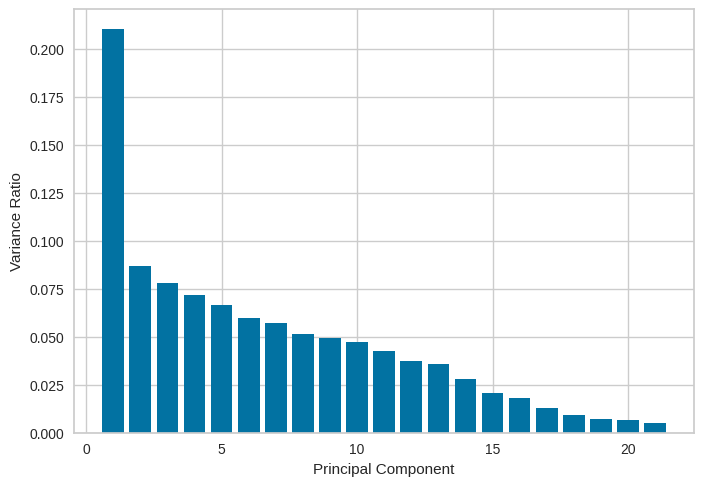

Percentage of cumulative variance of PCs:  [ 21.00386597  29.67416306  37.45258593  44.61733211  51.2460543
  57.20016191  62.92488468  68.05838078  73.01561329  77.75452579
  81.98475668  85.71205579  89.27539706  92.07041365  94.13009563
  95.91775444  97.22154244  98.1318704   98.82619816  99.47380183
 100.        ]
Selecting 3 PC's for the clustering


In [232]:
#Plot variance ratio of PCs
from sklearn.decomposition import PCA

# Fit our standardized data using PCA
pca = PCA()

# Fit PCA on scaled data
pca.fit(df_scaled)
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()
print('Percentage of cumulative variance of PCs: ', pca.explained_variance_ratio_.cumsum() * 100)
print("Selecting 3 PC's for the clustering")

In [233]:
# Initialize the PCA model with three components
pca = PCA(n_components=3, whiten=True)

# Fit and transform the data
df_pca = pca.fit_transform(df_scaled)

#Creating a Dataframe 
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3'])

In [234]:
#Describing the dataset
df_pca.describe()

,PC1,PC2,PC3
count,2.227000e+03,2.227000e+03,2.227000e+03
mean,3.190583e-17,4.147757e-17,4.307286e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.582215e+00,-2.556929e+00,-2.440351e+00
25%,-8.422737e-01,-7.060941e-01,-8.892332e-01
50%,2.052059e-01,-1.173697e-01,1.686571e-01
75%,9.069431e-01,6.372320e-01,8.468748e-01
max,2.656874e+00,4.561800e+00,2.900113e+00


### Perfoming elbow method to find the appropriate number of cluster

Elbow Method to determine the number of clusters to be formed:


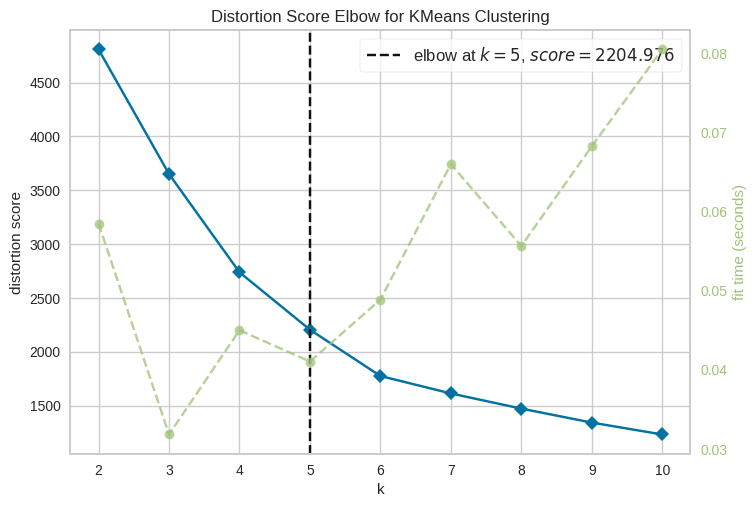

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [235]:
#Plotting the elbow graph 
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(n_init=10), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

### Implementing Different Clusetering Algorithm

In [236]:
# Define clustering methods
clustering_methods = [cluster.KMeans,
                      cluster.AgglomerativeClustering,
                      cluster.MeanShift,
                      cluster.AffinityPropagation,
                      cluster.SpectralClustering,
                      cluster.Birch
                     ]

data_arg = [(),(),(),(),(),(),()]


# Define parameters for each clustering method
clustering_para = [{'n_clusters':4},
                   {'n_clusters':4, 'linkage':'ward'},
                   {'cluster_all':False},
                   {'damping' : 0.9},
                   {'n_clusters':5},
                   {'threshold' : 0.01, 'n_clusters':4}
                  ]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



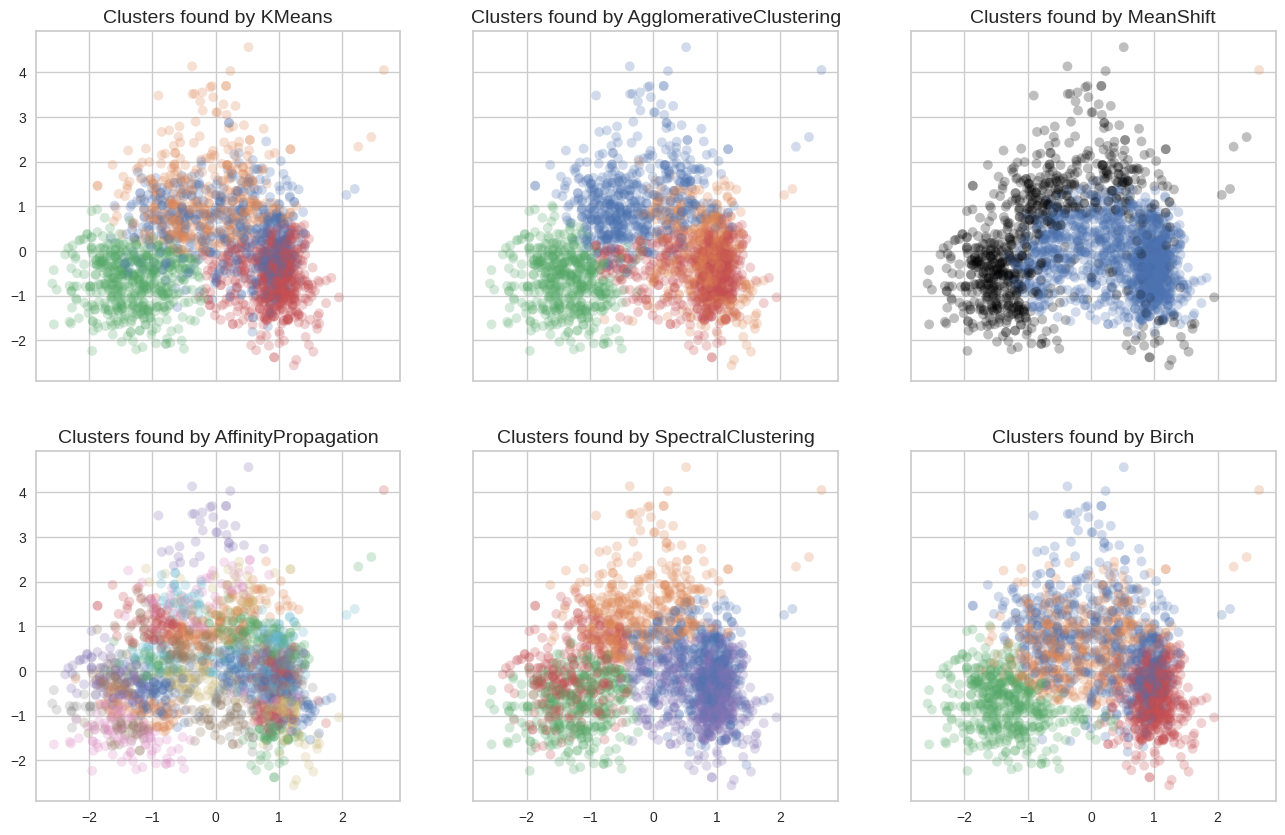

In [237]:
#Plotting the clusters for all the algorithms
plot_kwds = {'alpha' : 0.25, 's' : 50, 'linewidths':0}
clusters_series = []

def plot_clusters(data, algorithms, args, kwds, axs):
    for j, i in enumerate(axs):
        algorithm = algorithms[j]
        #start_time = time.time()
        labels = algorithm(*args[j], **kwds[j]).fit_predict(data)
        #end_time = time.time()
        clusters_series.append(labels)
        
        #plotting
        palette = sns.color_palette('deep', np.unique(labels).max() + 1)
        colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]        
        i.scatter(data.iloc[:,0], data.iloc[:,1],c=colors,  **plot_kwds)
        i.set_title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=14)
        #i.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=10)
    
    
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), sharex=True, sharey=True)
axs = axs.flatten()


plot_clusters(data=df_pca, 
              algorithms=clustering_methods, 
              args=data_arg, 
              kwds=clustering_para, 
              axs=axs)

In [238]:
#Computing Silhouette and Dunn Index for all the algorithms
X = df_pca
from validclust import dunn
from sklearn.metrics import pairwise_distances
# Compute the silhouette score for each method
for method, params in zip(clustering_methods, clustering_para):
    model = method(**params)
    y_pred = model.fit_predict(X)
    score = silhouette_score(X, y_pred)
    
    dist_indicator = pairwise_distances(X)
    dunn_indicator = dunn(dist_indicator,  y_pred)
    print(f'Dun Index for {type(model).__name__} : {dunn_indicator:.3f}')
    print(f"Silhouette score for {type(model).__name__}: {score:.3f}")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Dun Index for KMeans : 0.007
Silhouette score for KMeans: 0.333
Dun Index for AgglomerativeClustering : 0.026
Silhouette score for AgglomerativeClustering: 0.286
Dun Index for MeanShift : 0.008
Silhouette score for MeanShift: 0.197
Dun Index for AffinityPropagation : 0.016
Silhouette score for AffinityPropagation: 0.240
Dun Index for SpectralClustering : 0.013
Silhouette score for SpectralClustering: 0.345
Dun Index for Birch : 0.023
Silhouette score for Birch: 0.302


In [239]:
#Kmeans algorithm
from sklearn.cluster import KMeans
kmeans_df = df_pca.copy()
kmeans = KMeans(n_clusters=4, n_init=10, random_state=100)
kmeans.fit(kmeans_df)

KMeans(n_clusters=4, n_init=10, random_state=100)

In [240]:
#Calculating Score
from sklearn.metrics import silhouette_score
score = silhouette_score(kmeans_df, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.334


In [241]:
#Plotting clusters in Kmeans
import plotly.express as px
kmeans_df['Cluster'] = kmeans.labels_
fig = px.scatter_3d(kmeans_df, x = 'PC1', y = 'PC2', z ='PC3',
                    color = 'Cluster', opacity = 0.5)
fig

In [242]:
df['Cluster'] = kmeans.labels_

## Distribution of clusters

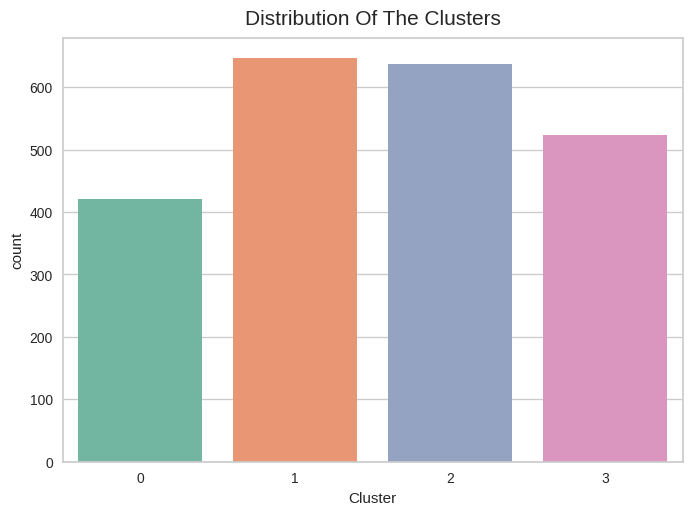

In [243]:
#Amount of Customers in each cluster plot
pl = sns.countplot(x=kmeans_df["Cluster"], palette= "Set2")
pl.set_title("Distribution Of The Clusters", pad=10, size = 15)
plt.show()

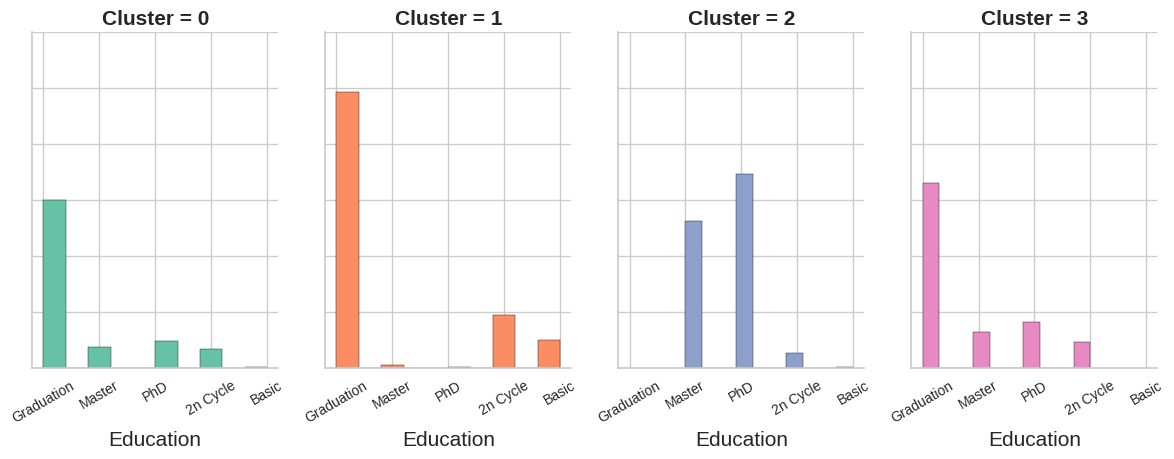

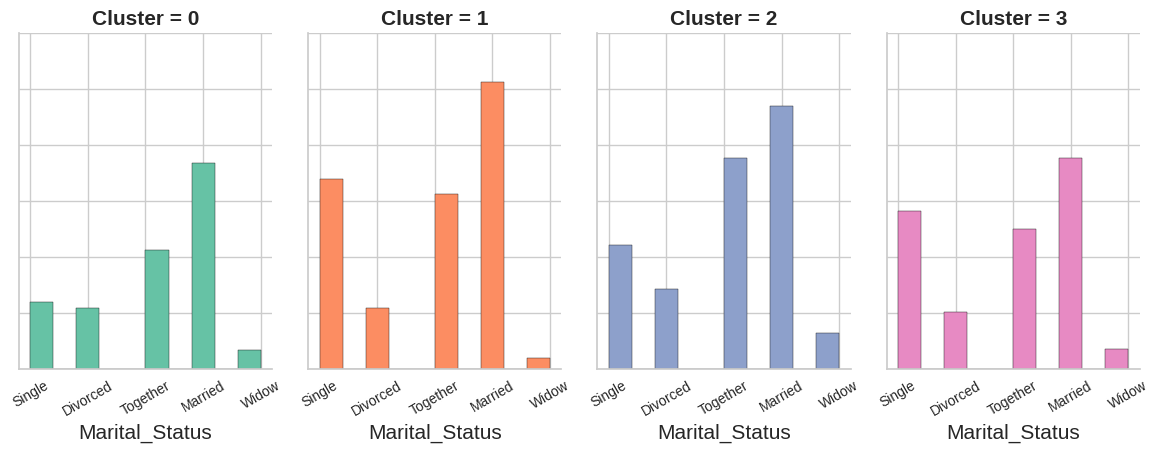

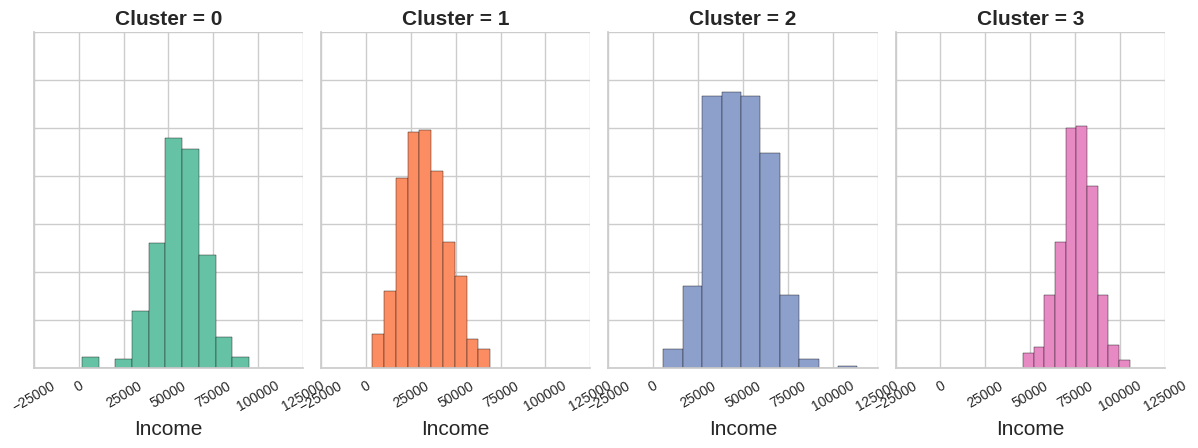

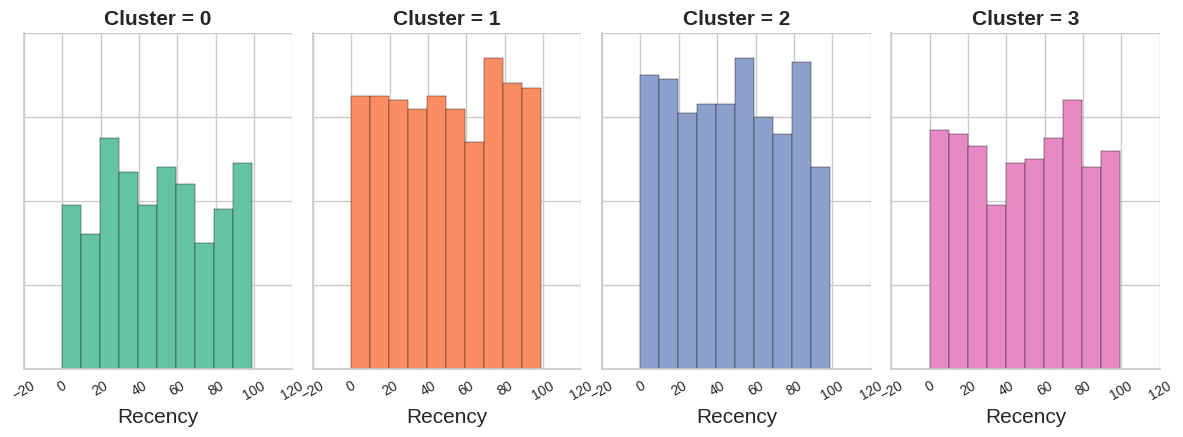

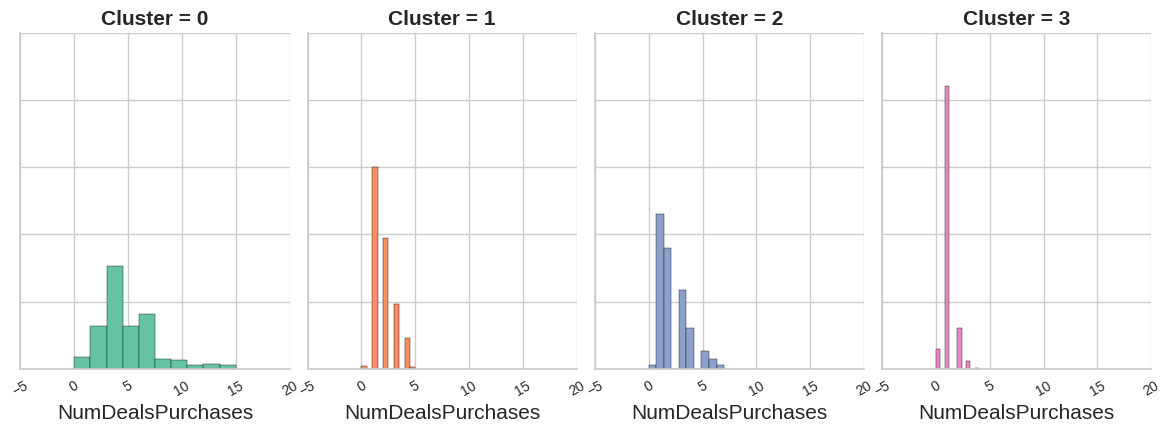

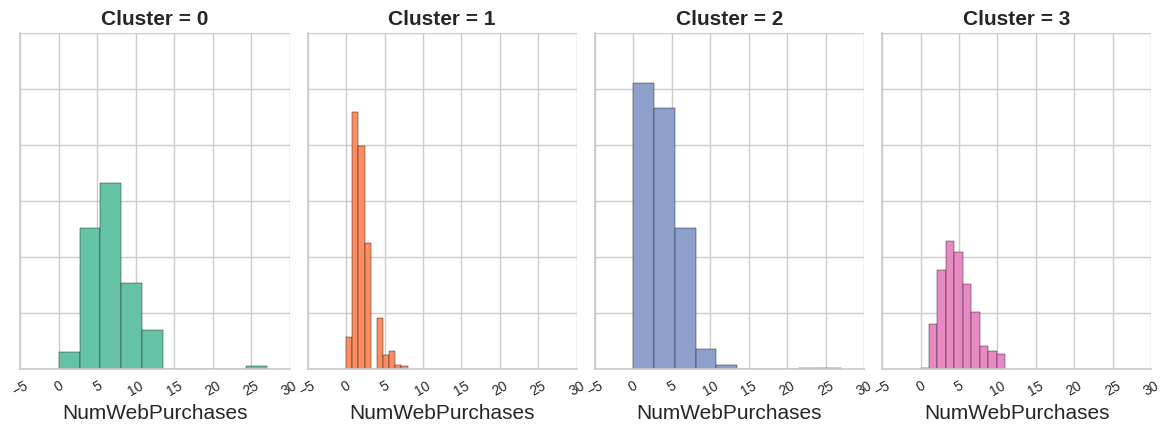

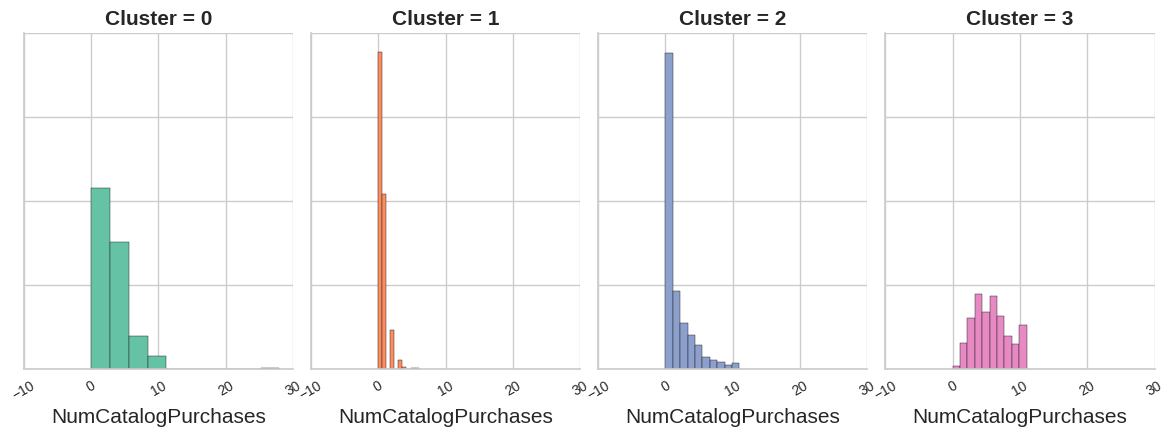

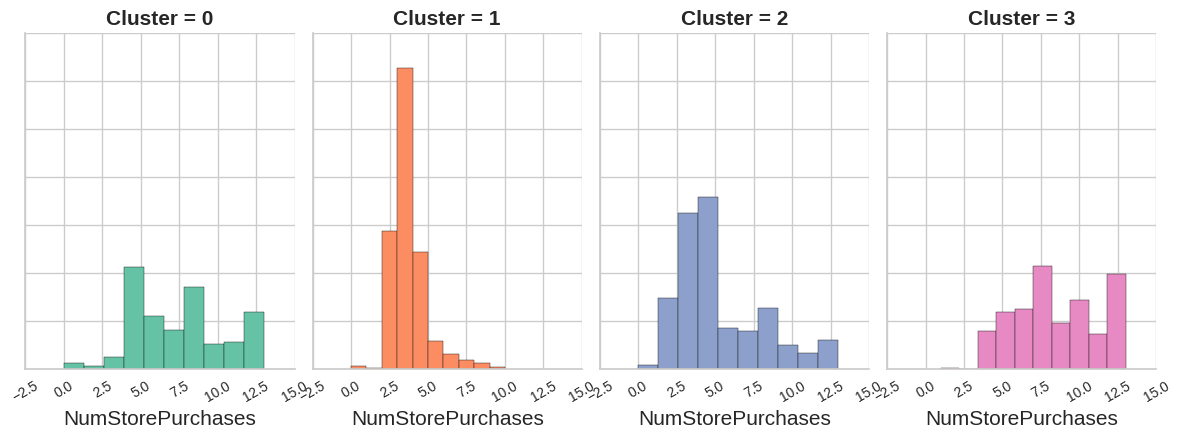

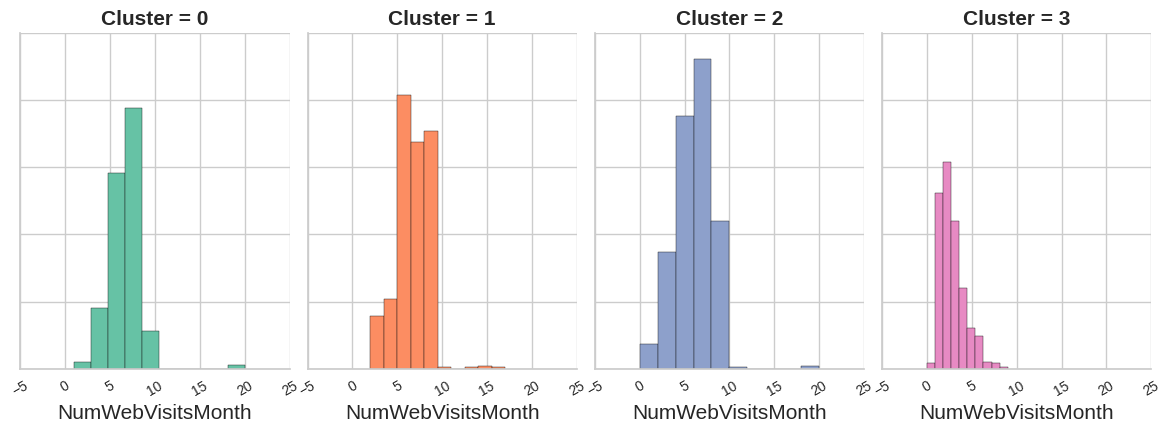

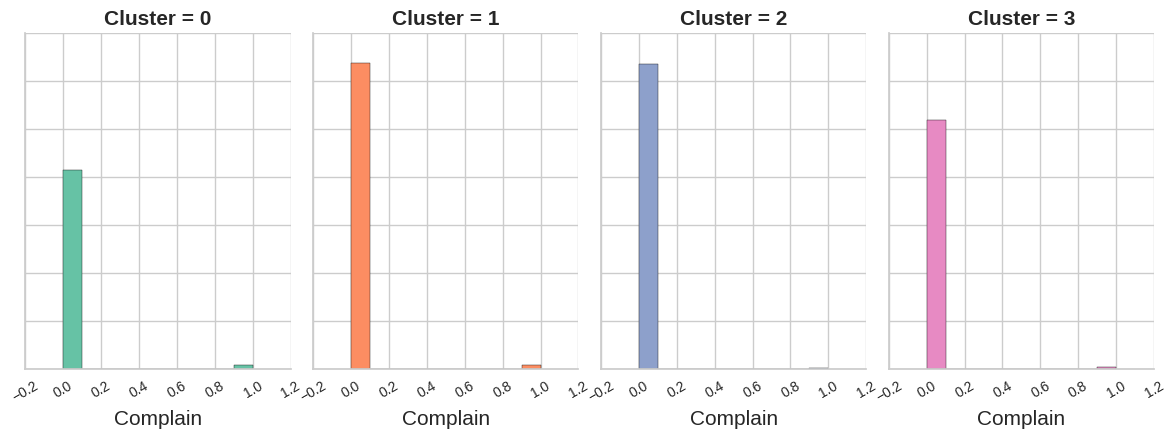

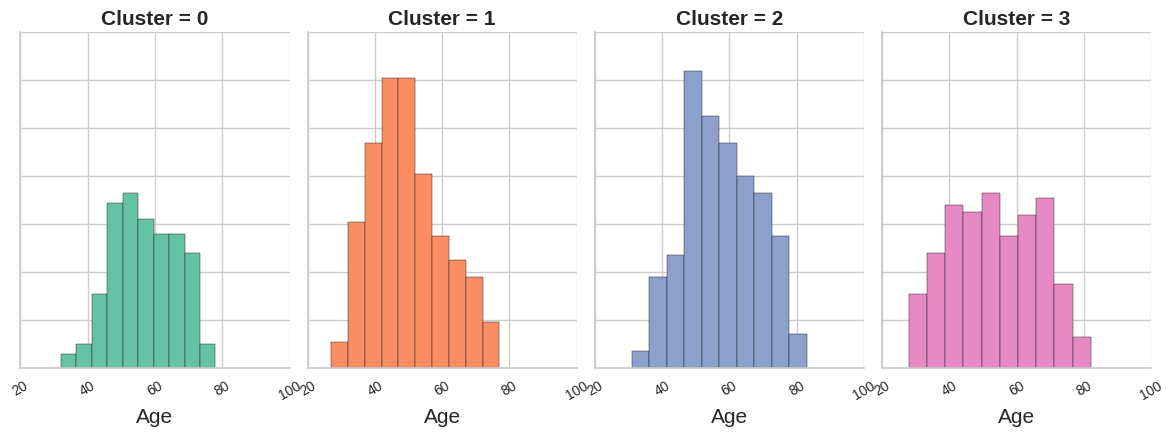

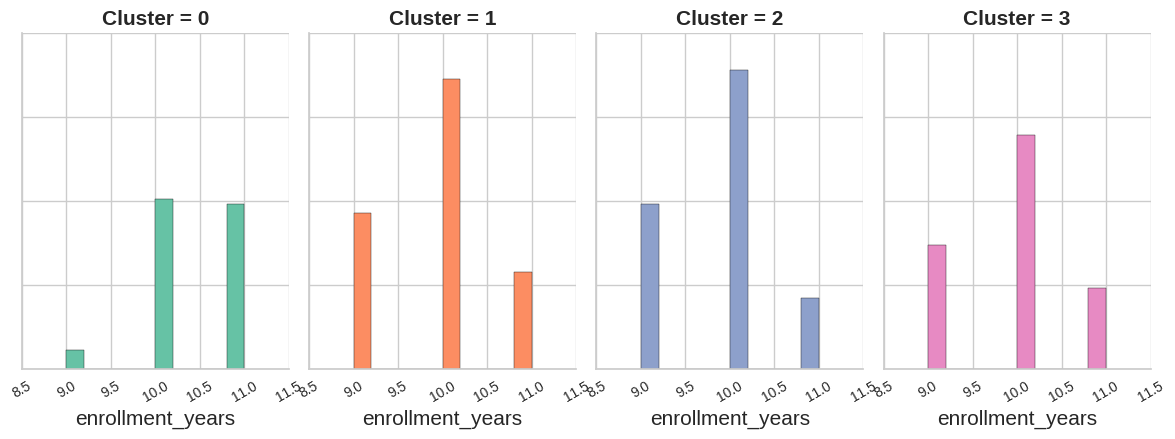

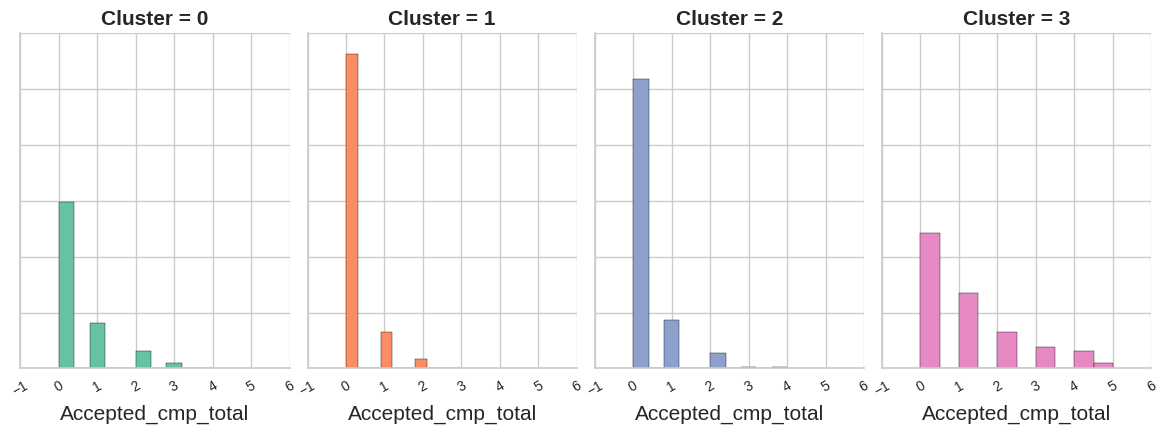

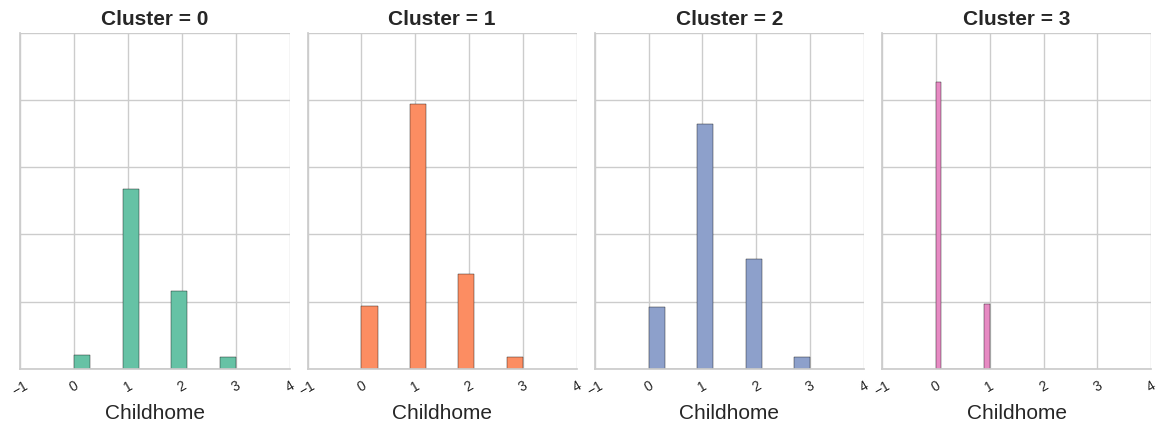

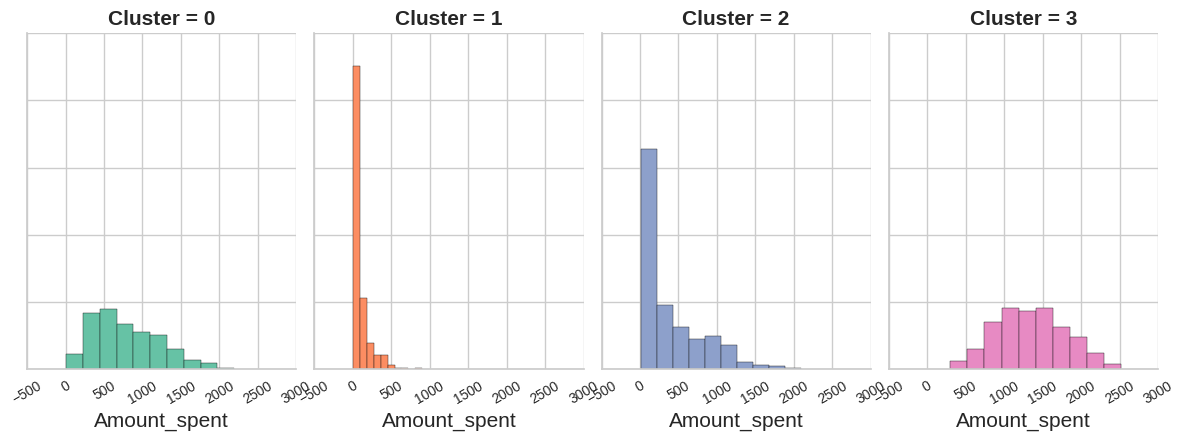

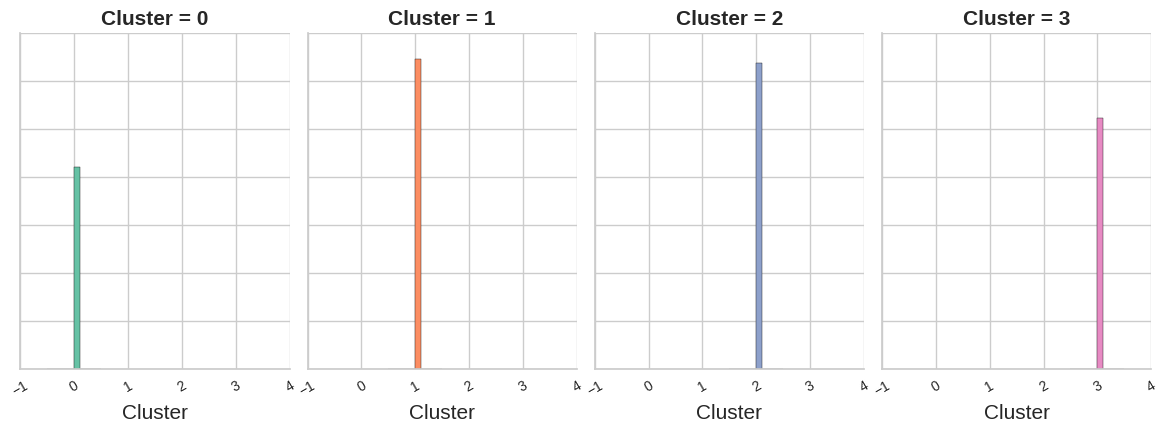

In [244]:
#Visualizing cluster over different variables to analyse patterns
for i in df:
    g = sns.FacetGrid(df, col = "Cluster", hue = "Cluster", palette= "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30)
    g.set_yticklabels()
    g.set_xlabels(size=15)
    g.set_titles(size=15, fontweight="bold")
    g.fig.set_figheight(5)

In [245]:
#Clustering summary
df.groupby(['Cluster']).sum()

<ipython-input-245-e321a4245158>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,enrollment_years,Accepted_cmp_total,Childhome,Amount_spent
Cluster,,,,,,,,,,,,,
0,2.354326e+07,20864,1967,2874,1327,3148,2760,7,23994,4383,177,553,332817
1,2.121122e+07,32273,1181,1336,349,2091,4163,9,31839,6389,102,727,64542
2,3.046401e+07,30395,1435,2342,1175,3297,3572,1,36631,6257,163,744,244513
3,3.975058e+07,25920,578,2573,3024,4408,1379,3,28050,5178,557,96,707031


## Customer Segmentation 

**ELITE CUSTOMERS**

Cluster 3: Highest Income, Graduates, 0 or 1 child, Highest amount spent, more campaigns with positive performance. Highest Catalog purchases. Least number of web visits. But more number of web purchases.  

**GOOD CUSTOMERS**

Cluster 0: High Income and Amount spent. Mostly a parent with 1 OR 2 kids. Tend to purchase more in deals compared to other customers. Web visits dominate.

**ECONOMIC CUSTOMERS**

Cluster 1: People with lower income who have most number of children. Most of them are together. So, these represent people with more members in the family. Tend to buy more in deals and very less catalog purchases.  

**ORDINARY CUSTOMERS**

Cluster 2: Lowest income and amount spent , less education, Overall less number of purchases. Includes comparatively less children and includes people from martial status as together and alone. 


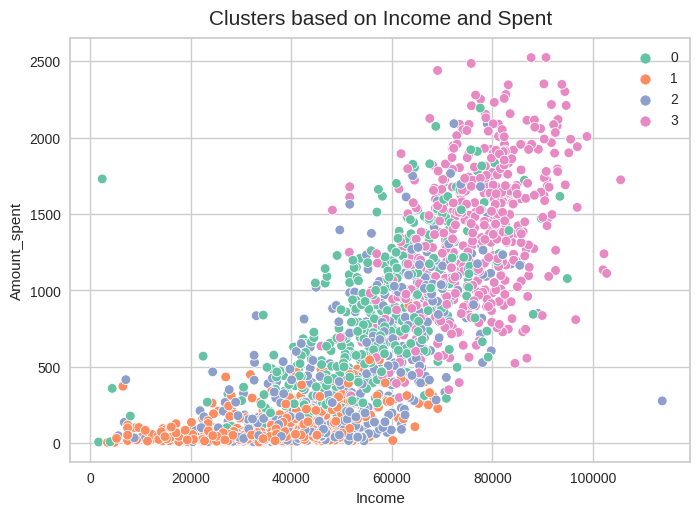

In [246]:
#Viusalizing clusters with amount spent and Income
pl = sns.scatterplot(data = df, x = df['Income'] , y = df['Amount_spent'], hue = df['Cluster'], palette = "Set2")
pl.set_title('Clusters based on Income and Spent', pad=10, size=15)
plt.legend()
plt.show()

In [247]:
df['group'] = df['Cluster']                     # Create new variable
df['group'] = df['group'].astype(str)           # Change data type 

# Renaming the Clusters
df['group'] = df['group'].str.replace('0', 'Good Customers')
df['group'] = df['group'].str.replace('1', 'Economical Customers')
df['group'] = df['group'].str.replace('2', 'Ordinary Customers')
df['group'] = df['group'].str.replace('3', 'Elite Customers')

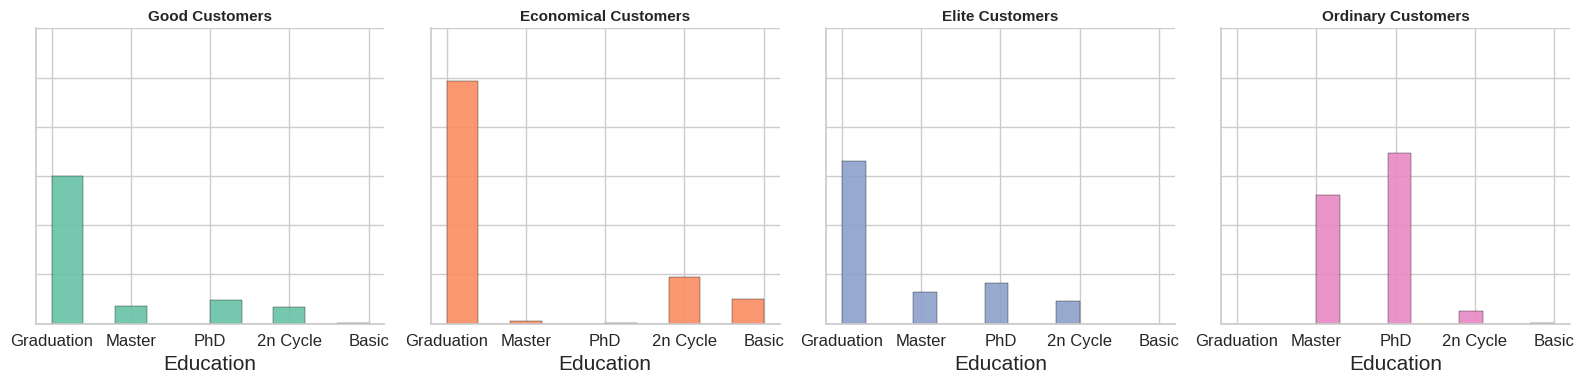

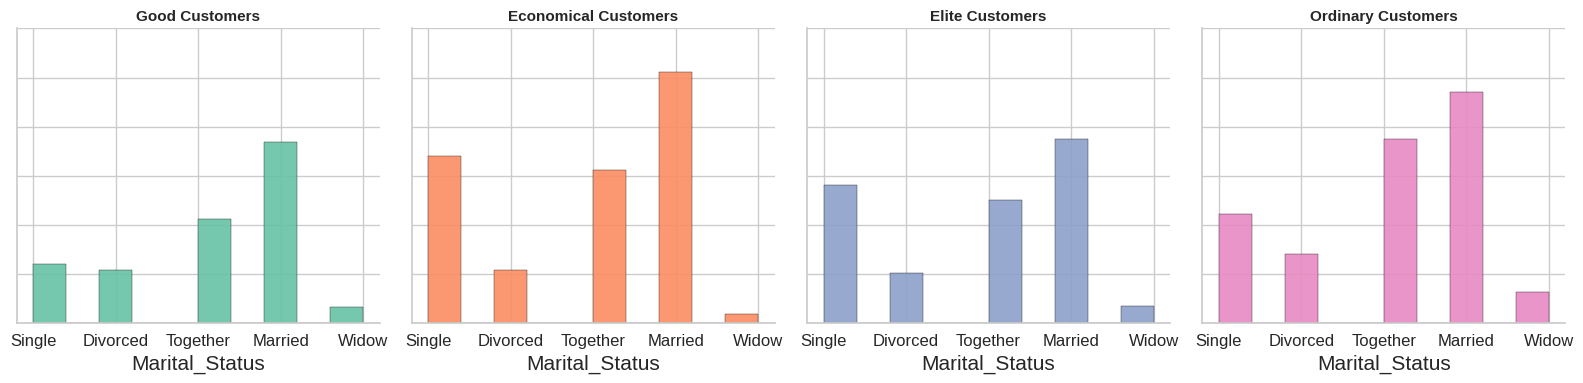

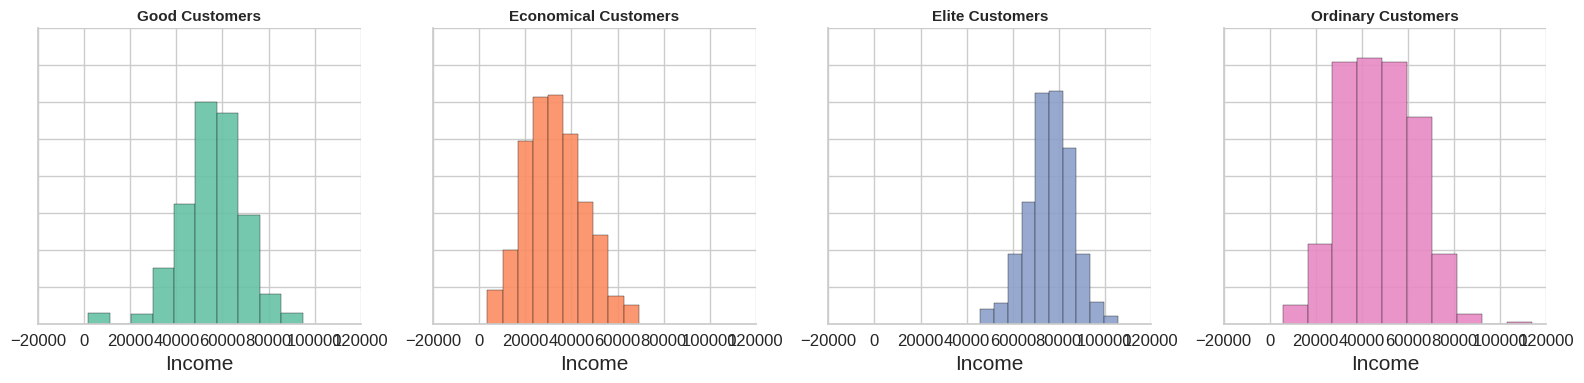

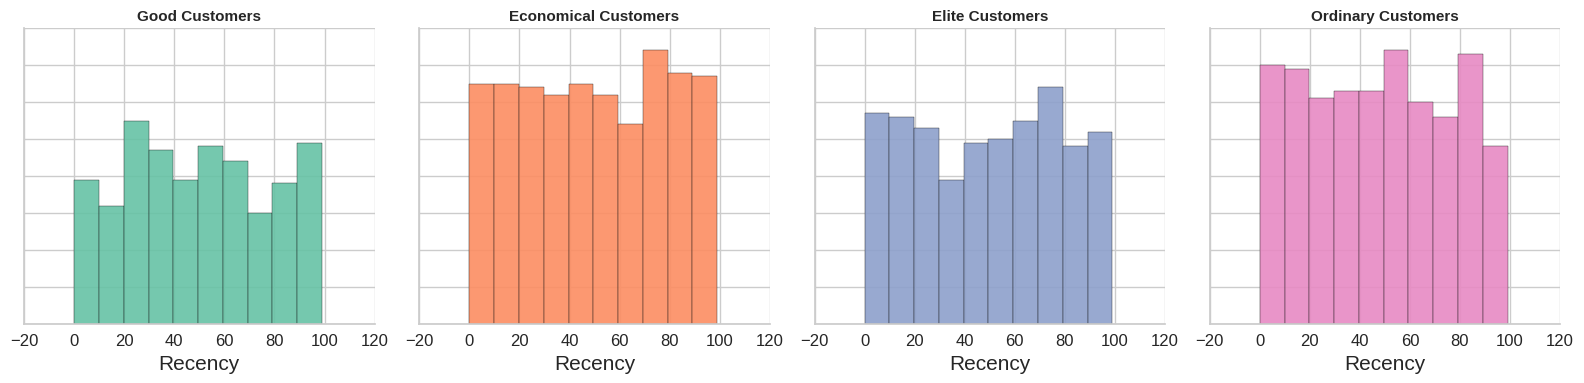

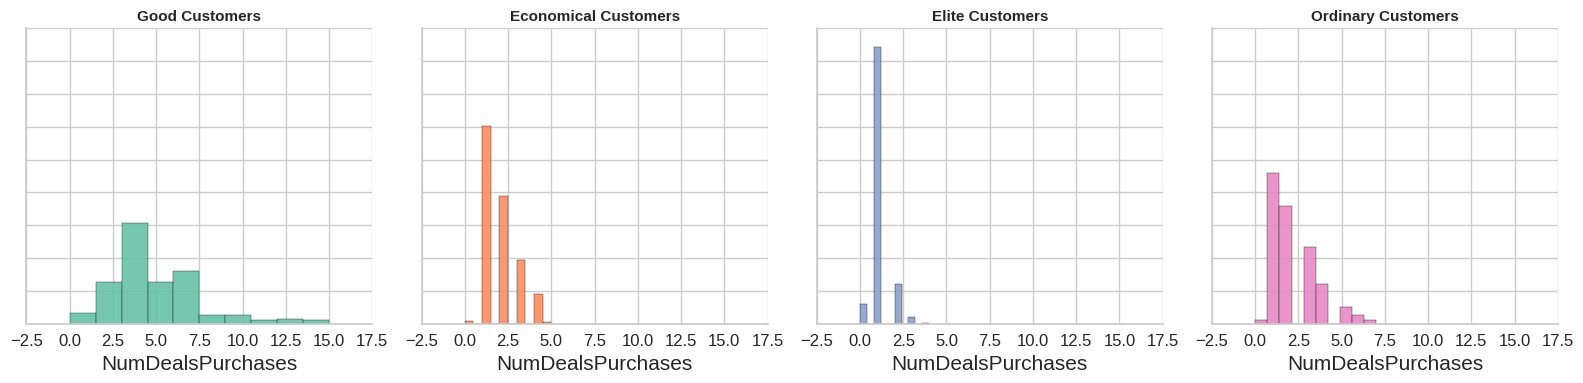

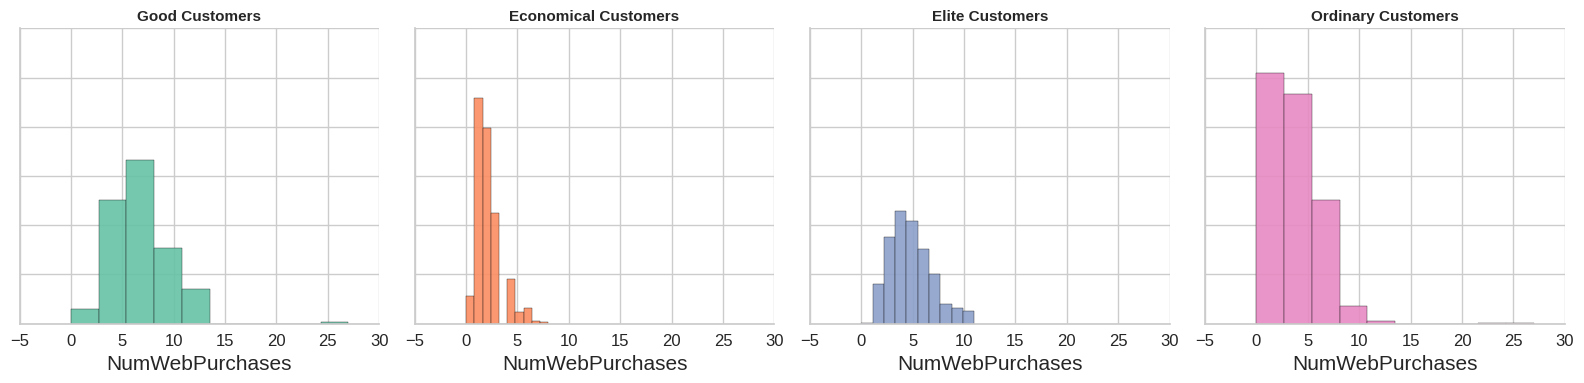

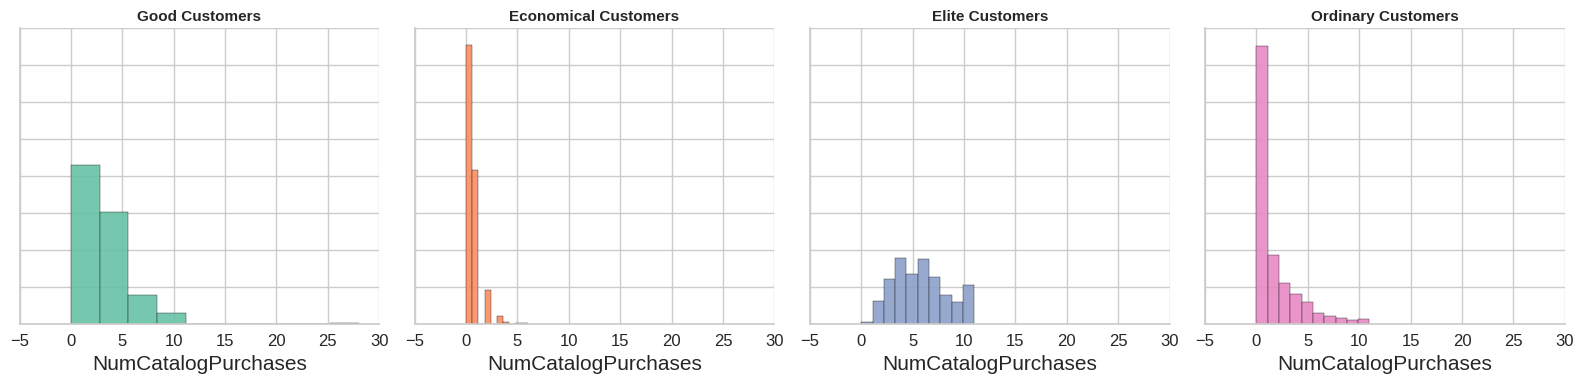

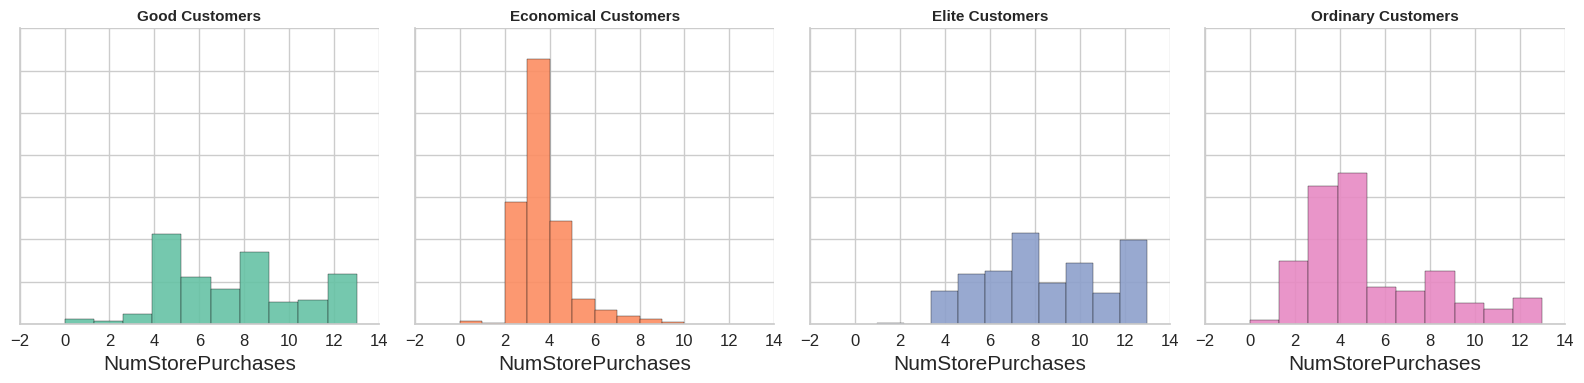

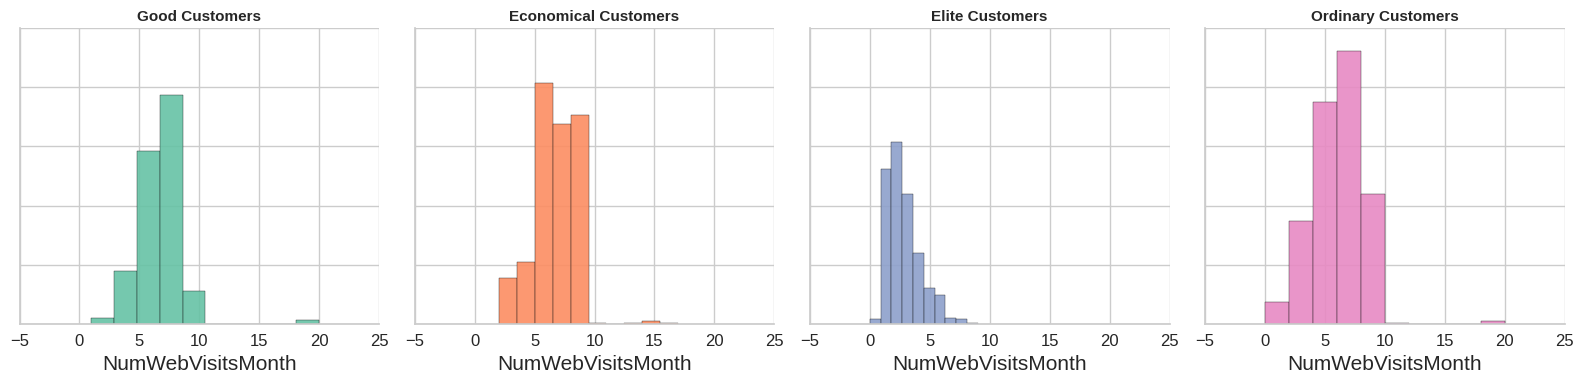

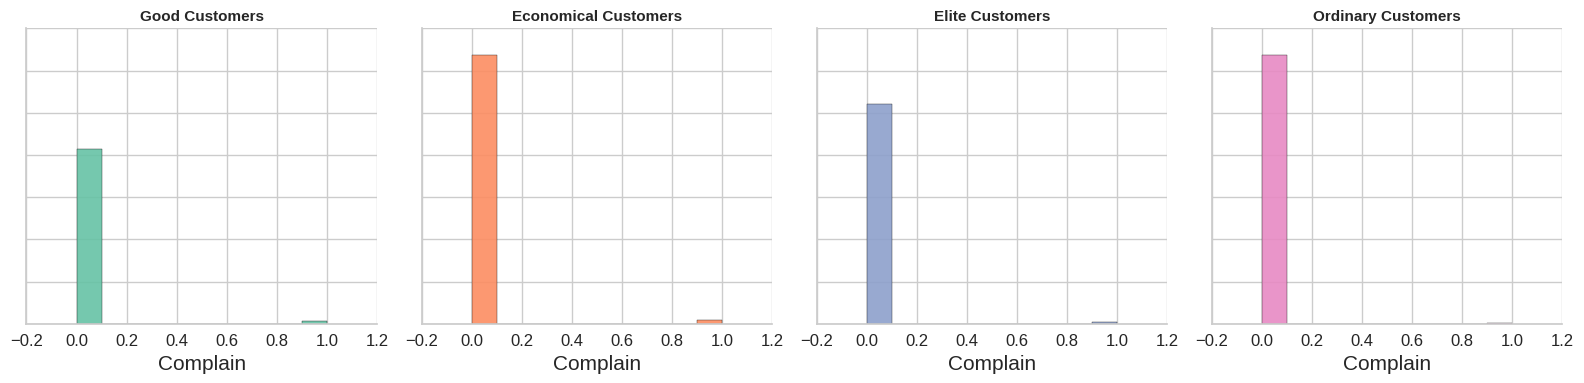

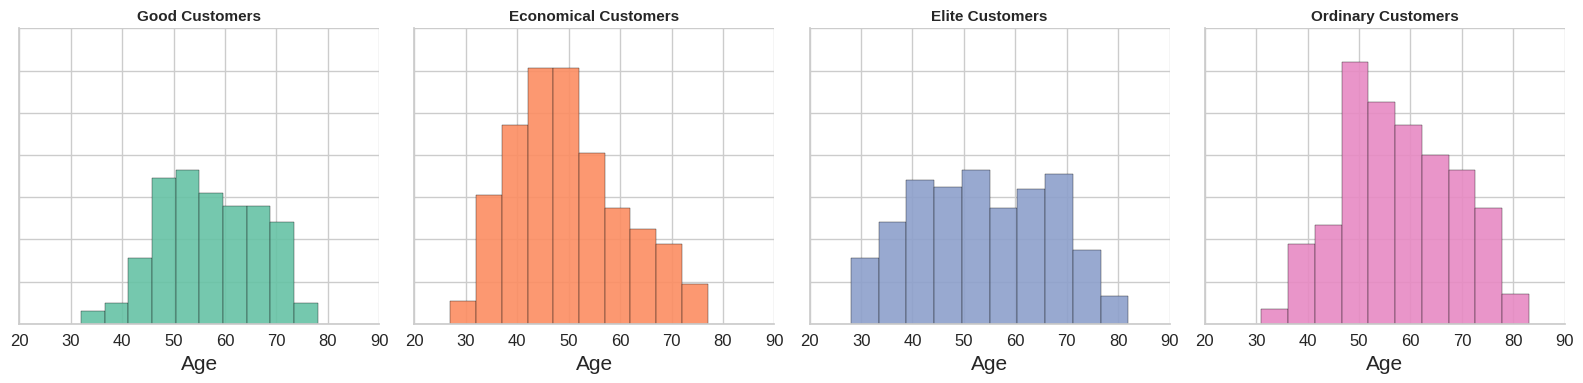

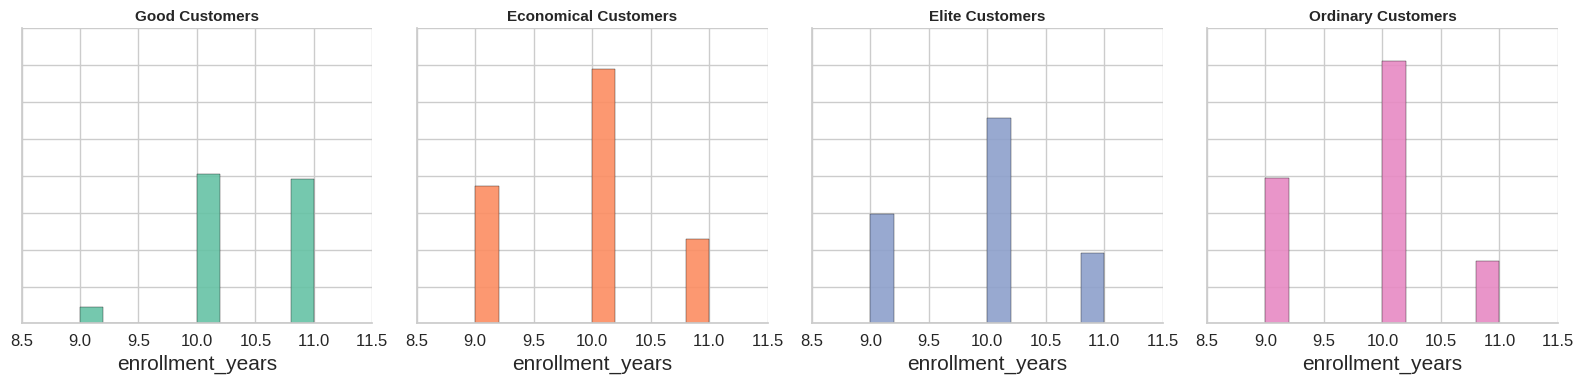

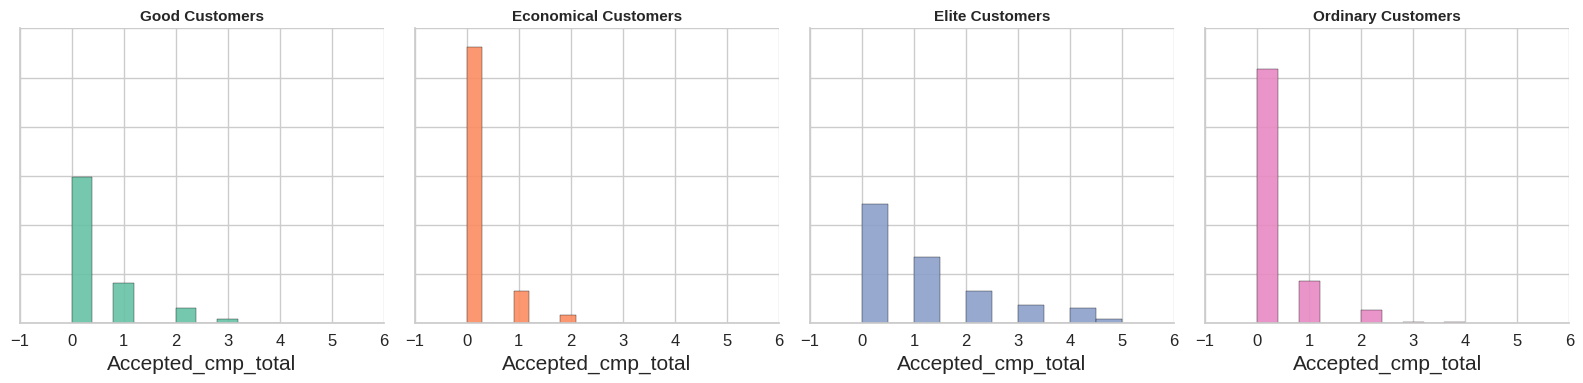

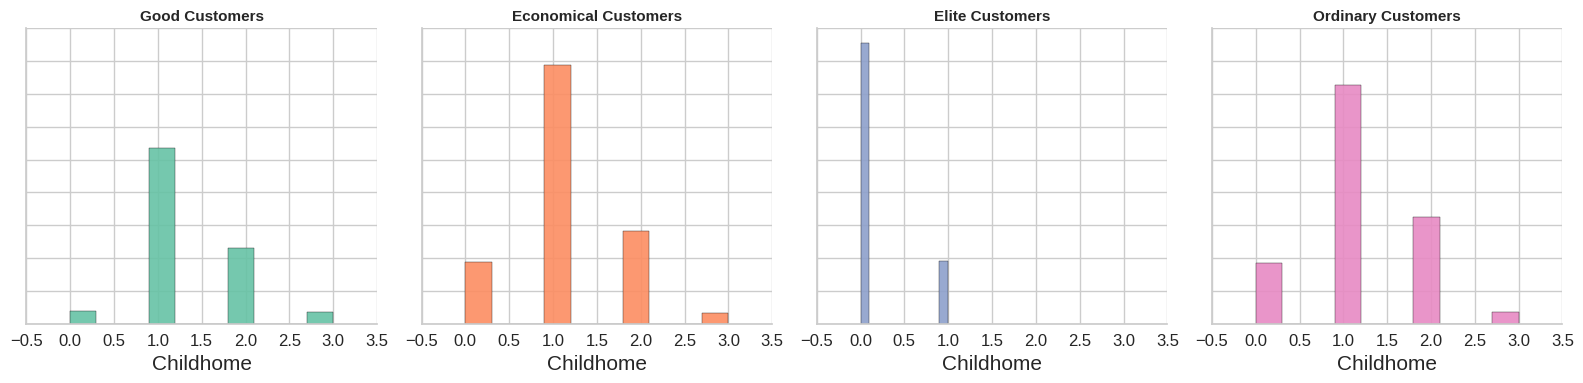

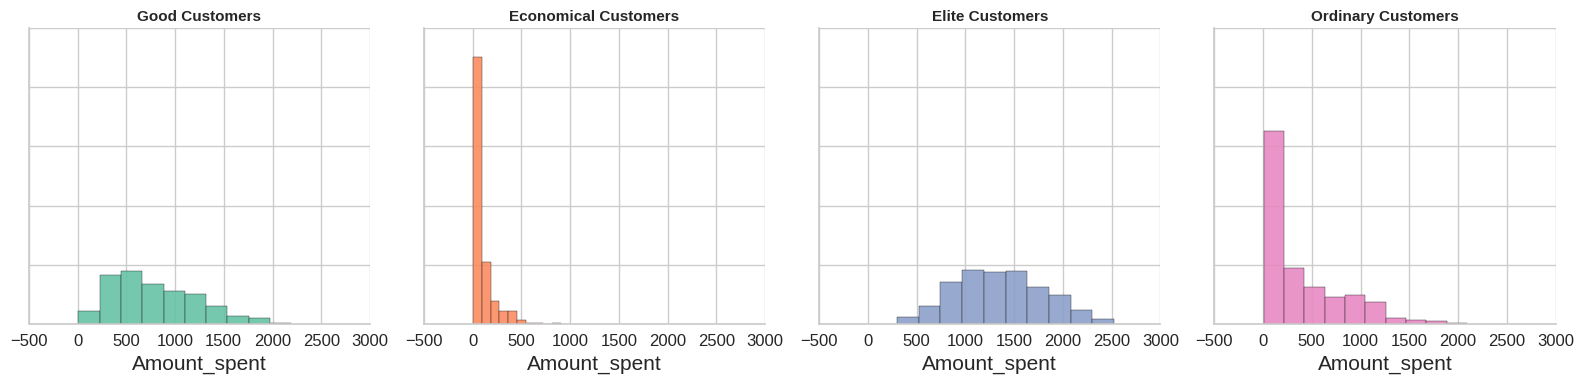

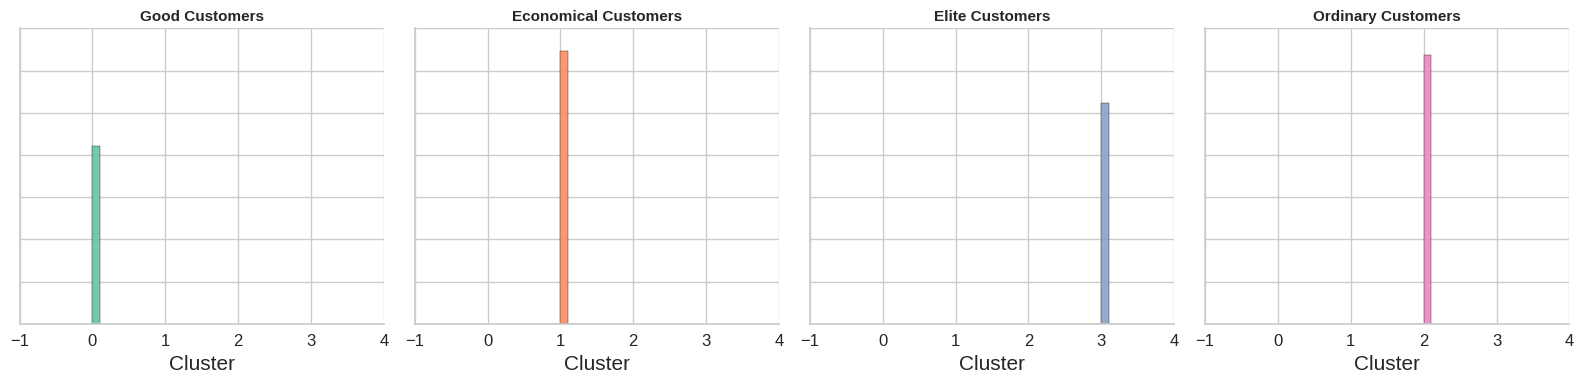

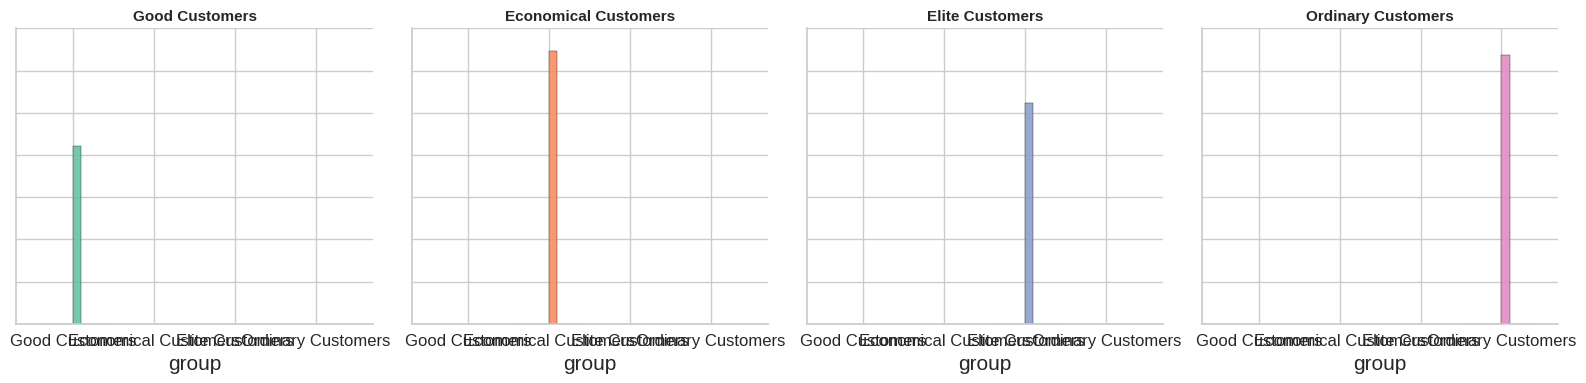

In [248]:
#Visualizing the Clusters 
for i in df:
  # Create FacetGrid object with specified parameters
  g = sns.FacetGrid(df, col='group', hue="group", palette="Set2", height=4)

  # Map histogram plot to the FacetGrid for each variable i in df
  g.map(plt.hist, i, alpha=0.9, edgecolor='k')

  # Set tick labels for x-axis and y-axis
  g.set_xticklabels(fontsize=12)
  g.set_yticklabels(fontsize=12)

  # Set x-axis label for all subplots
  g.set_xlabels(fontsize=15)

  # Set titles for each subplot
  g.set_titles("{col_name}", fontsize=17,fontweight="bold" )

  # Adjust layout and spacing of subplots
  g.fig.tight_layout(w_pad=1)

  # Display the plot
  plt.show()

In [249]:
# Calculate the percentage of promotions accepted for each cluster
df['Percentage_Promos'] = round(df['Accepted_cmp_total']*100/ df['Accepted_cmp_total'].sum(), 4)

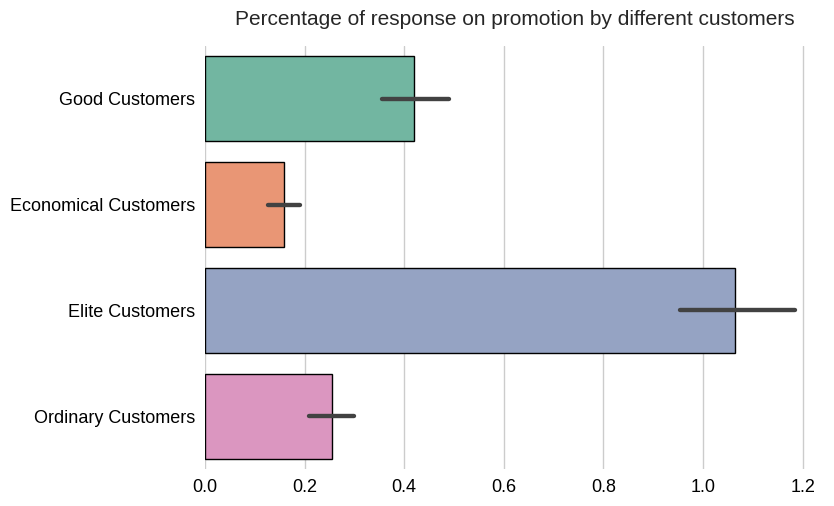

In [250]:
#fig = plt.figure(figsize = (20, 4))

# create barplot using seaborn where x is products in the category, y is the current iteration of the cl list
a = sns.barplot(data=df, x='Accepted_cmp_total', y='group', 
                palette='Set2', linestyle="-", linewidth=1, edgecolor="black")
plt.xticks(size=13, color='black')
plt.yticks(size=13, color='black')
plt.title('Percentage of response on promotion by different customers', pad=15, size=15)
plt.xlabel('')
plt.ylabel('')

    
for j in ['right', 'top', 'left', 'bottom']:
    a.spines[j].set_visible(False)

plt.show()